# We will be performing all the below steps in Feature Engineering :-
1. Handling Missing Values
2. Temporal variables ( eg - Datetime vaiables )
3. Categorical Variables
4. Replace categorical features with numerical values
5. Standardize the value of the variables to the same range

In [31]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [32]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# To Display Maximum rows and columns

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [34]:
# lets see the data
data = pd.read_csv("/content/drive/MyDrive/Colab dataset/LifeExpectancy.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [35]:
data.describe(include = 'all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Maldives,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [37]:
# first we will find the missing value perentage in the each feature

# we will try to find the percentage of missing values in the each feature
dataset= data.copy()
# we will get the all the feature with missing values
feature_nan = [feature for feature in dataset.columns if data[feature].isnull().sum()>1]

# missing value percentage the ecah featrue
for feature in feature_nan:
    print("The missing value percentage(%) in ",feature, np.round(data[feature].isnull().mean(),4))

The missing value percentage(%) in  Life expectancy  0.0034
The missing value percentage(%) in  Adult Mortality 0.0034
The missing value percentage(%) in  Alcohol 0.066
The missing value percentage(%) in  Hepatitis B 0.1882
The missing value percentage(%) in   BMI  0.0116
The missing value percentage(%) in  Polio 0.0065
The missing value percentage(%) in  Total expenditure 0.0769
The missing value percentage(%) in  Diphtheria  0.0065
The missing value percentage(%) in  GDP 0.1525
The missing value percentage(%) in  Population 0.2219
The missing value percentage(%) in   thinness  1-19 years 0.0116
The missing value percentage(%) in   thinness 5-9 years 0.0116
The missing value percentage(%) in  Income composition of resources 0.0568
The missing value percentage(%) in  Schooling 0.0555


In [38]:
for feature in feature_nan:
    median = data[feature].median()
    # Replacing the missing value with median
    data[feature] = np.where(data[feature].isnull(),median,data[feature]) 

In [39]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [40]:
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
cat_features

['Country', 'Status']

In [41]:
status = pd.get_dummies(data['Status'],drop_first = True)
status.head()

,Developing
0,1
1,1
2,1
3,1
4,1


In [42]:
# Adding status to the data
data = pd.concat([data,status],axis = 1)
# Now Dropping the Status column
data = data.drop(columns=['Status'],axis = 1)
data.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [43]:
#We will be using count encoding for the country feature
Country_count = data['Country'].value_counts().to_dict()
data['Country'] = data['Country'].map(Country_count)
data.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
0,16,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,16,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,16,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,16,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,16,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [44]:
x = data.drop(['Life expectancy '],axis = 1)
y = data['Life expectancy ']
x.head()

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
0,16,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,16,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,16,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,16,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,16,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [45]:
# split the dataset into train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state =0)
print(x_train.shape,x_test.shape)

(2350, 21) (588, 21)


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)
x_train_sc[0:2]

array([[1.00000000e+00, 3.33333333e-01, 8.86426593e-02, 0.00000000e+00,
        6.71378092e-01, 8.02119054e-02, 8.86597938e-01, 4.71291291e-06,
        6.29200463e-01, 0.00000000e+00, 9.89583333e-01, 3.48229832e-01,
        9.89690722e-01, 0.00000000e+00, 2.18752835e-01, 1.08185160e-04,
        2.89855072e-02, 3.15789474e-02, 8.71308017e-01, 6.52173913e-01,
        0.00000000e+00],
       [1.00000000e+00, 6.66666667e-02, 3.76731302e-01, 1.38888889e-02,
        1.00117786e-01, 1.42144949e-03, 9.27835052e-01, 1.77252655e-02,
        1.32097335e-01, 1.32000000e-02, 5.83333333e-01, 3.09344167e-01,
        4.12371134e-02, 4.15841584e-02, 2.76041187e-03, 1.05319894e-03,
        4.16666667e-01, 4.10526316e-01, 4.34599156e-01, 3.67149758e-01,
        1.00000000e+00]])

## Feature Selection - 
#### We select the features based on the independent features correlation with each other.we never select features according to the target feature correlation with other features.
Remove the correlated features  - To remove the correlated features, we can make use of the corr() method of the pandas dataframe. The corr() method returns a correlation matrix containing correlation between all the columns of the dataframe. We can then loop through the correlation matrix and see if the correlation between two columns is greater than threshold correlation, add that column to the set of correlated columns. We can remove that set of columns from the actual dataset.

In [47]:
# We only remove features those are highly correlated,(we only check for training data).

correlation_matrix = x_train.corr()
correlation_matrix

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
Country,1.000000,-0.074280,0.010899,0.015627,0.049768,0.018238,0.024338,0.012967,-0.087285,0.015957,0.002763,-0.067463,0.002027,0.019882,0.022081,0.010869,0.051931,0.051673,-0.021578,0.038814,-0.027871
Year,-0.074280,1.000000,-0.091507,-0.038303,-0.055871,0.026939,0.018315,-0.087018,0.114649,-0.043417,0.091945,0.083262,0.119504,-0.149175,0.094037,-0.001775,-0.052249,-0.056524,0.239597,0.209489,-0.020088
Adult Mortality,0.010899,-0.091507,1.000000,0.075772,-0.195132,-0.240747,-0.123184,0.044060,-0.385276,0.090876,-0.265832,-0.112413,-0.270515,0.523581,-0.281020,-0.009154,0.305665,0.308468,-0.441505,-0.430566,0.312048
infant deaths,0.015627,-0.038303,0.075772,1.000000,-0.111050,-0.083184,-0.175749,0.492895,-0.224170,0.996933,-0.169885,-0.124625,-0.171197,0.020442,-0.100583,0.581818,0.470369,0.478755,-0.137287,-0.180774,0.107694
Alcohol,0.049768,-0.055871,-0.195132,-0.111050,1.000000,0.339320,0.093330,-0.046836,0.320687,-0.108198,0.217619,0.290669,0.216667,-0.042669,0.306605,-0.027017,-0.405864,-0.394652,0.416660,0.491865,-0.566440
percentage expenditure,0.018238,0.026939,-0.240747,-0.083184,0.339320,1.000000,0.043570,-0.052295,0.236031,-0.085473,0.146199,0.168788,0.143115,-0.095896,0.892345,-0.017416,-0.244698,-0.245882,0.373113,0.381012,-0.453427
Hepatitis B,0.024338,0.018315,-0.123184,-0.175749,0.093330,0.043570,1.000000,-0.077257,0.110171,-0.177791,0.364817,0.063006,0.452849,-0.089711,0.082982,-0.145988,-0.093807,-0.099584,0.128060,0.145198,-0.123241
Measles,0.012967,-0.087018,0.044060,0.492895,-0.046836,-0.052295,-0.077257,1.000000,-0.182242,0.504942,-0.156865,-0.105217,-0.158852,0.033738,-0.066304,0.220663,0.231767,0.234772,-0.119145,-0.118041,0.070485
BMI,-0.087285,0.114649,-0.385276,-0.224170,0.320687,0.236031,0.110171,-0.182242,1.000000,-0.234478,0.297529,0.229792,0.281995,-0.242358,0.283506,-0.073673,-0.533412,-0.538079,0.477898,0.501854,-0.307525
under-five deaths,0.015957,-0.043417,0.090876,0.996933,-0.108198,-0.085473,-0.177791,0.504942,-0.234478,1.000000,-0.186650,-0.126471,-0.190284,0.032206,-0.103880,0.572853,0.472145,0.478964,-0.154265,-0.195570,0.110734


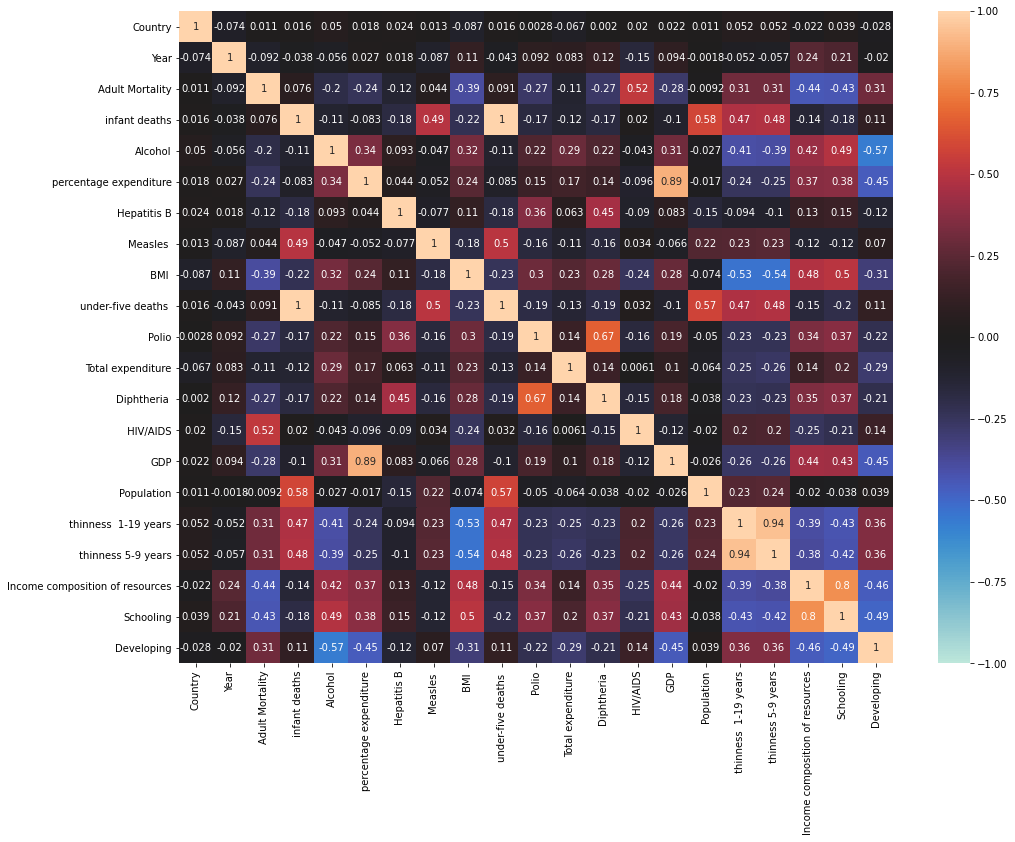

In [48]:
plt.figure(figsize = (16,12))
sns.heatmap(correlation_matrix,annot = True, vmin=-1, vmax=1, center= 0)

We have created correlation matrix correlation_matrix for all the columns in our dataset. We also created a set correlated_features which will contain names of all the correlated features.
Next, we will loop through all the columns in the correlation_matrix and will add the columns with a correlation value of 0.70 to the correlated_features set as shown below. You can set any threshold value for the correlation

#### Selcting the features with correlation greater than threshold value(0.7)

In [49]:
correlated_features = set()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [50]:
print(correlated_features)

{'under-five deaths ', 'Schooling', 'GDP', ' thinness 5-9 years'}


In [51]:
# Dropping highly correlated features
x_train = x_train.drop(columns = ['GDP', 'under-five deaths ', 'Schooling', ' thinness 5-9 years'],axis =1)
x_test = x_test.drop(columns = ['GDP', 'under-five deaths ', 'Schooling', ' thinness 5-9 years'],axis =1)
x_train.head()

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Developing
683,16,2005,65.0,0,11.41,1562.520827,88.0,1,55.3,98.0,6.37,98.0,0.1,127658.0,0.9,0.826,0
478,16,2001,273.0,25,1.71,27.689711,92.0,3761,12.4,59.0,5.70,6.0,2.2,1242473.0,11.6,0.412,1
2359,16,2001,124.0,0,10.80,196.302624,92.0,0,51.8,93.0,8.57,92.0,0.1,19926.0,2.2,0.824,0
971,16,2006,288.0,3,2.93,0.000000,95.0,0,21.5,94.0,5.52,95.0,3.0,1386542.0,9.0,0.415,1
880,16,2001,225.0,0,0.01,88.629458,92.0,0,54.3,94.0,4.85,94.0,0.1,1388115.0,2.4,0.781,1


In [52]:
y_train[0:5]

683     78.7
478     58.5
2359    76.2
971     58.2
880     78.0
Name: Life expectancy , dtype: float64

In [53]:
# for those algo's which required sacled feature
# converting into dataframe
x_train_sc = pd.DataFrame(x_train_sc,columns=x.columns)
x_test_sc = pd.DataFrame(x_test_sc,columns=x.columns)
# dropping selected feature
x_train_sc = x_train_sc.drop(columns =  ['GDP', 'under-five deaths ', 'Schooling', ' thinness 5-9 years'],axis =1)
x_test_sc = x_test_sc.drop(columns =  ['GDP', 'under-five deaths ', 'Schooling', ' thinness 5-9 years'],axis =1)
x_train_sc.head()

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Developing
0,1.0,0.333333,0.088643,0.000000,0.671378,0.080212,0.886598,0.000005,0.629200,0.989583,0.348230,0.989691,0.000000,0.000108,0.028986,0.871308,0.0
1,1.0,0.066667,0.376731,0.013889,0.100118,0.001421,0.927835,0.017725,0.132097,0.583333,0.309344,0.041237,0.041584,0.001053,0.416667,0.434599,1.0
2,1.0,0.066667,0.170360,0.000000,0.635453,0.010077,0.927835,0.000000,0.588644,0.937500,0.475914,0.927835,0.000000,0.000017,0.076087,0.869198,0.0
3,1.0,0.400000,0.397507,0.001667,0.171967,0.000000,0.958763,0.000000,0.237543,0.947917,0.298897,0.958763,0.057426,0.001175,0.322464,0.437764,1.0
4,1.0,0.066667,0.310249,0.000000,0.000000,0.004550,0.927835,0.000000,0.617613,0.947917,0.260012,0.948454,0.000000,0.001177,0.083333,0.823840,1.0


# Model Building

#### Selecting Model for model Building with Cross validation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

lr_reg = LinearRegression()
rg_reg = Ridge()
dt_reg =  DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
knn_reg = KNeighborsRegressor()
svr_reg = SVR()
xgb_reg =  XGBRegressor()

In [55]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr_reg,x_train_sc,y_train,cv = 5)
print("Score for the Linear regressor",score.mean())

Score for the Linear regressor 0.7912292877265793


In [56]:
score = cross_val_score(rg_reg,x_train_sc,y_train,cv = 5)
print("Score for the ridge regressor",score.mean())

Score for the ridge regressor 0.7913019945159203


In [57]:
score = cross_val_score(dt_reg,x_train,y_train,cv = 5)
print("Score for the Decision Tree regressor",score.mean())

Score for the Decision Tree regressor 0.9165766632080941


In [58]:
score = cross_val_score(rf_reg,x_train,y_train,cv = 5)
print("Score for the Random Forest regressor",score.mean())

Score for the Random Forest regressor 0.957683529624269


In [59]:
score = cross_val_score(knn_reg,x_train_sc,y_train,cv = 5)
print("Score for the KNN regressor",score.mean())

Score for the KNN regressor 0.8770651508686041


In [60]:
score = cross_val_score(svr_reg,x_train_sc,y_train,cv = 5)
print("Score for the SVM regressor",score.mean())

Score for the SVM regressor 0.820443166467369


In [61]:
score = cross_val_score(xgb_reg,x_train,y_train,cv = 5)
print("Score for the xgboost regressor",score.mean())


[10:17:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Score for the xgboost regressor 0.9421680714771515


### We can see that Random forest and XGBOOST are the best performing models. We will choose random forest for model building

In [93]:
from sklearn.metrics import mean_squared_error
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
y_predict = rf_reg.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
mse


4.204842418367342

### Hpyerparameter Tunning 

The paper, An empirical study on hyperparameter tuning of decision trees. also states that the ideal min_samples_leaf values tend to be between 1 to 20 for the CART algorithm. This paper also indicates that min_samples_split and min_samples_leaf are the most responsible for the performance of the final trees from their relative importance analysis

According to the paper, An empirical study on hyperparameter tuning of decision trees, the ideal min_samples_split values tend to be between 1 to 40 for the CART algorithm which is the algorithm implemented in scikit-learn. min_samples_split is used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can also lead to under-fitting hence depending on the level of underfitting or overfitting, you can tune the values for min_samples_split.

In [95]:
from sklearn.model_selection import RandomizedSearchCV
rf_regressor = RandomForestRegressor()

parameters = [  {'n_estimators' : [200,300,400,500,600,700] },
                {'max_depth' : [x for x in range(10,20)] },
                {'min_samples_split' : [x for x in range(15,20)]},
             ]
search = RandomizedSearchCV(estimator = rf_regressor, param_distributions = parameters,n_iter = 20,cv= 5, scoring="r2", n_jobs=-1,random_state =42)
search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [96]:
search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [97]:
# best hyperparameters
search.best_params_

{'n_estimators': 300}

In [98]:
y_predict = search.predict(x_test)
y_predict[0:5]

array([77.70233333, 67.20933333, 52.69133333, 58.65233333, 56.59866667])

In [99]:
from sklearn.metrics import mean_squared_error
msa = mean_squared_error(y_test,y_predict)
print("Mean Absolute error is :",msa)


Mean Absolute error is : 4.1298214338624515


## We can see that we are able to reduce the mean square error on the test data 